<a href="https://colab.research.google.com/github/PriyanshuKSG/Loan_Approval_prediction_22B2165/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style

#**Loading the Data**

In [6]:
path = '/content/drive/MyDrive/Loan_Train.csv'
df = pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#**Handling Missing values and Cleaning data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Loan ID is always unique and does not influence anything on loan approval so we decide to drop it as it is of no use for us.
df = df.drop(['Loan_ID'], axis = 1)

# We have 13 missing values in Gender column. Let's handle that first. We'll drop those rows because we cannot assume/calculate anyone's gender.
df = df[df['Gender'].notna()]

# Labeling male as 1 and female as 0
df['Gender'].replace('Male', 1, inplace = True)
df['Gender'].replace('Female', 0, inplace = True)

# I think it is fine to assume that if data is missing then they are not married.
# That is why we replace missing values with 0 because our dataset is alredy small and dropping more rows is not feasible.
df['Married'].replace('Yes', 1, inplace = True)
df['Married'].replace('No', 0, inplace = True)
df['Married'].fillna(0.0, inplace = True)

# Whoever does not have any dependents (nan) we can assume that they have zero dependents. Reason is same as above.
df['Dependents'].fillna('0', inplace = True)
df['Dependents'].replace('1', 1, inplace = True)
df['Dependents'].replace('0', 0, inplace = True)
df['Dependents'].replace('3+', 3, inplace = True)
df['Dependents'].replace('2', 2, inplace = True)

# No missing values in this column
df['Education'].replace('Graduate', 1, inplace = True)
df['Education'].replace('Not Graduate', 0, inplace = True)

# We are assuming that people are not self-employed (they work in a company/start-up) if data is missing. Same reason as above.
df['Self_Employed'].fillna('No', inplace = True)
df['Self_Employed'].replace('Yes', 1, inplace = True)
df['Self_Employed'].replace('No', 0, inplace = True)

# We will replace the missing values in Loan Amount with their mean.
# We calculate mean and median using the below code and later I found that replacing with mean is better option because it serves more "central" to the data.
mean = df['LoanAmount'].mean()
median = df['LoanAmount'].median()
df['LoanAmount'].fillna(mean, inplace = True)

# We will replace the missing values in Loan_Amount_Term with 360 because it has the highest frequency (mode) and it does make sense that missing data will be 360.
df['Loan_Amount_Term'].fillna(360, inplace = True)

# For the missing values in the Credit_History column we are replacing 1 who takes a loan more than 100k because it is likely that he/she is not taking loan for the first time.
# It is just an assumption. Dropping rows is not feasible due to same reason.
df.reset_index(inplace = True)
for i in range(df.shape[0]):
  if(df['Credit_History'][i] != 1 and df['Credit_History'][i] != 0):
    if(df['LoanAmount'][i] > 100):
      df['Credit_History'][i] = 1
    else:
      df['Credit_History'][i] = 0

# No missing values
df['Property_Area'].replace('Urban', 2, inplace = True)
df['Property_Area'].replace('Rural', 0, inplace = True)
df['Property_Area'].replace('Semiurban', 1, inplace = True)

# No missing values
df['Loan_Status'].replace('Y', 1, inplace = True)
df['Loan_Status'].replace('N', 0, inplace = True)

<ipython-input-9-2bb366010997>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History'][i] = 1
<ipython-input-9-2bb366010997>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History'][i] = 0


In [10]:
df.isnull().sum()

index                0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**This is how our dataset looks afer all the cleaning**

In [11]:
df

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0.0,0,1,0,5849,0.0,145.017271,360.0,1.0,2,1
1,1,1,1.0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1.0,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1.0,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0.0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,609,0,0.0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
597,610,1,1.0,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
598,611,1,1.0,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
599,612,1,1.0,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


**Analyzing the data**

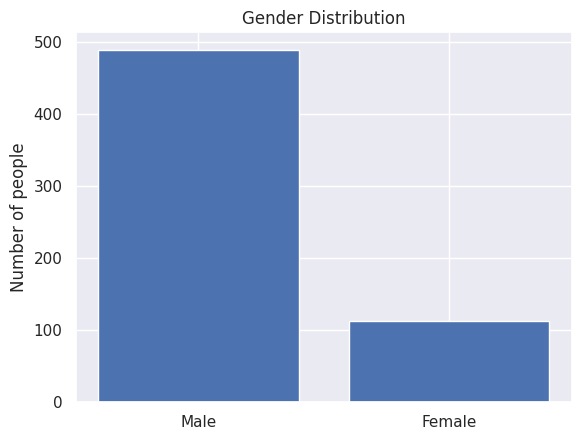

In [13]:
labels = ['Male', 'Female']
values = df['Gender'].value_counts()
plt.bar(labels, values)
plt.title("Gender Distribution")
plt.ylabel("Number of people")
plt.show()

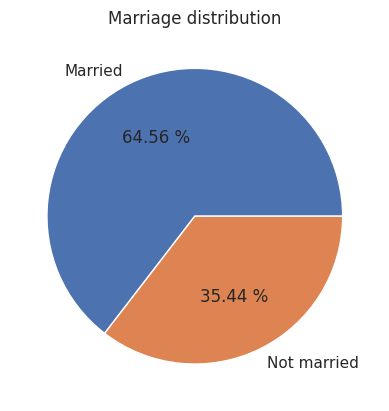

In [14]:
l = df['Married'].value_counts().tolist()
labels = ['Married', 'Not married']
plt.title('Marriage distribution')
plt.pie(l,labels = labels, explode = (0,0), autopct = "%.2f %%")
plt.show()

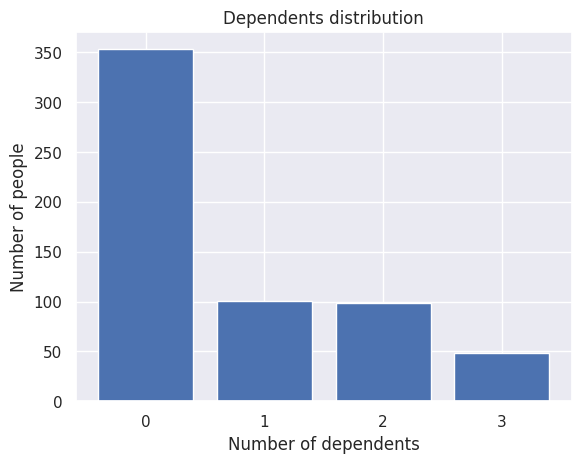

In [15]:
values = df['Dependents'].value_counts()
labels = [0,1,2,3]
plt.xticks([0,1,2,3])
plt.title('Dependents distribution')
plt.xlabel('Number of dependents')
plt.ylabel('Number of people')
plt.bar(labels, values)
plt.show()

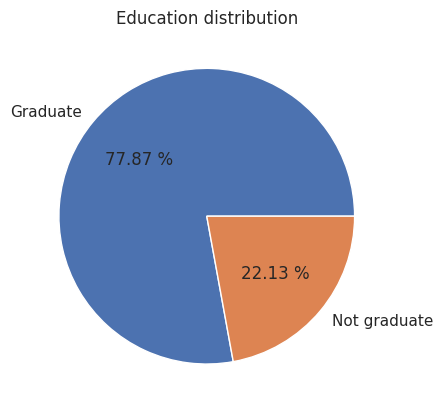

In [16]:
l = df['Education'].value_counts().tolist()
labels = ['Graduate', 'Not graduate']
plt.title('Education distribution')
plt.pie(l,labels = labels, explode = (0,0), autopct = "%.2f %%")
plt.show()

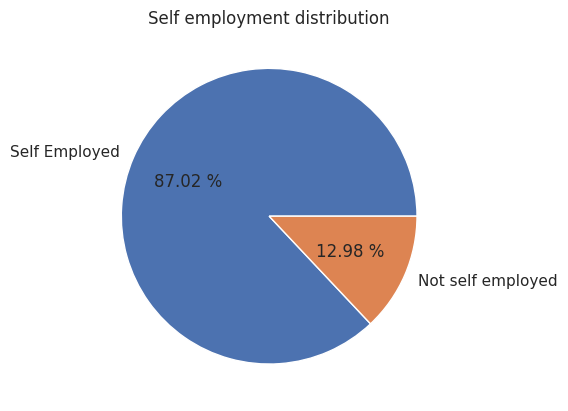

In [17]:
l = df['Self_Employed'].value_counts().tolist()
labels = ['Self Employed', 'Not self employed']
plt.title('Self employment distribution')
plt.pie(l,labels = labels, explode = (0,0), autopct = "%.2f %%")
plt.show()

In [18]:
max = df['ApplicantIncome'].max()
min = df['ApplicantIncome'].min()
print(max, min)

81000 150


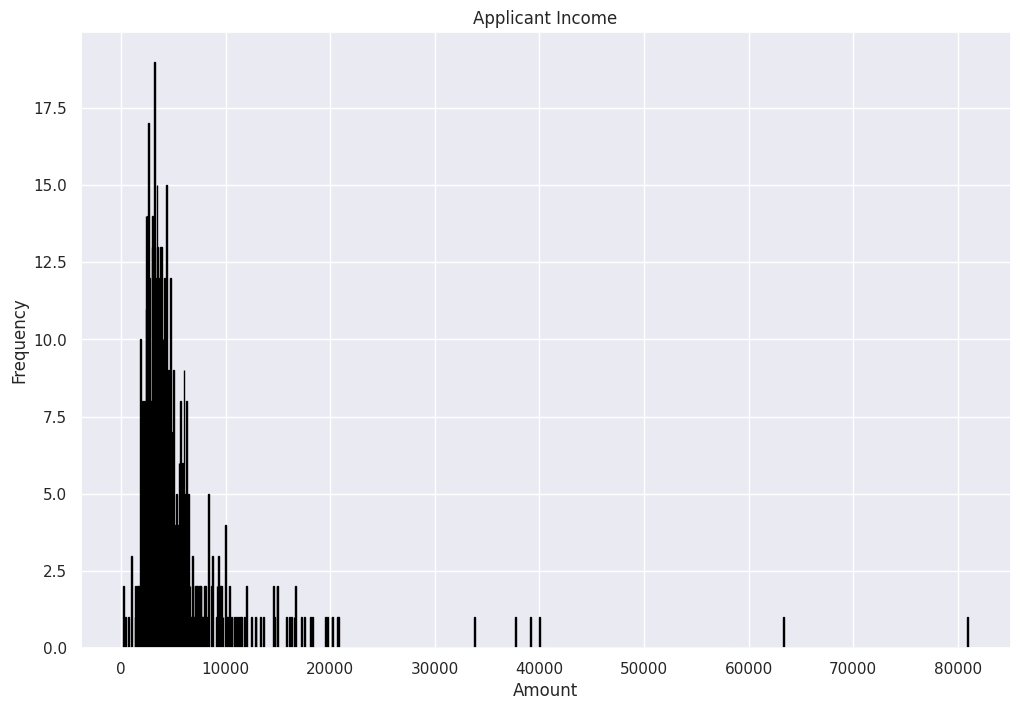

In [19]:
plt.figure(figsize = (12,8))
plt.hist(df['ApplicantIncome'], bins = 1000, edgecolor='black')
plt.title('Applicant Income')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [20]:
max = df['CoapplicantIncome'].max()
min = df['CoapplicantIncome'].min()
print(max, min)

41667.0 0.0


In [21]:
df_zero = df[df['CoapplicantIncome'] == 0]
print("Number of people with Co-Applicant income equal to zero = ", df_zero.shape[0])

Number of people with Co-Applicant income equal to zero =  267


In [22]:
df_not_zero = df[df['CoapplicantIncome'] != 0]

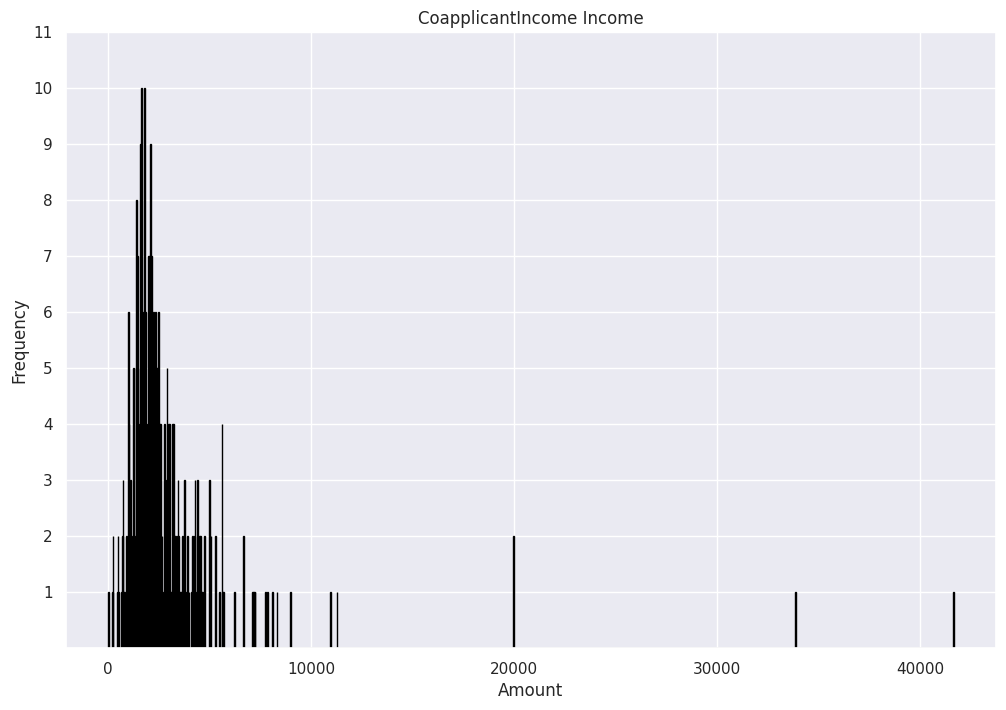

In [23]:
plt.figure(figsize = (12,8))
plt.hist(df_not_zero['CoapplicantIncome'], bins = 1000, edgecolor='black')
plt.title('CoapplicantIncome Income')
plt.xlabel('Amount')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11])
plt.ylabel('Frequency')
plt.show()

In [24]:
max = df['LoanAmount'].max()
min = df['LoanAmount'].min()
print(max, min)

650.0 9.0


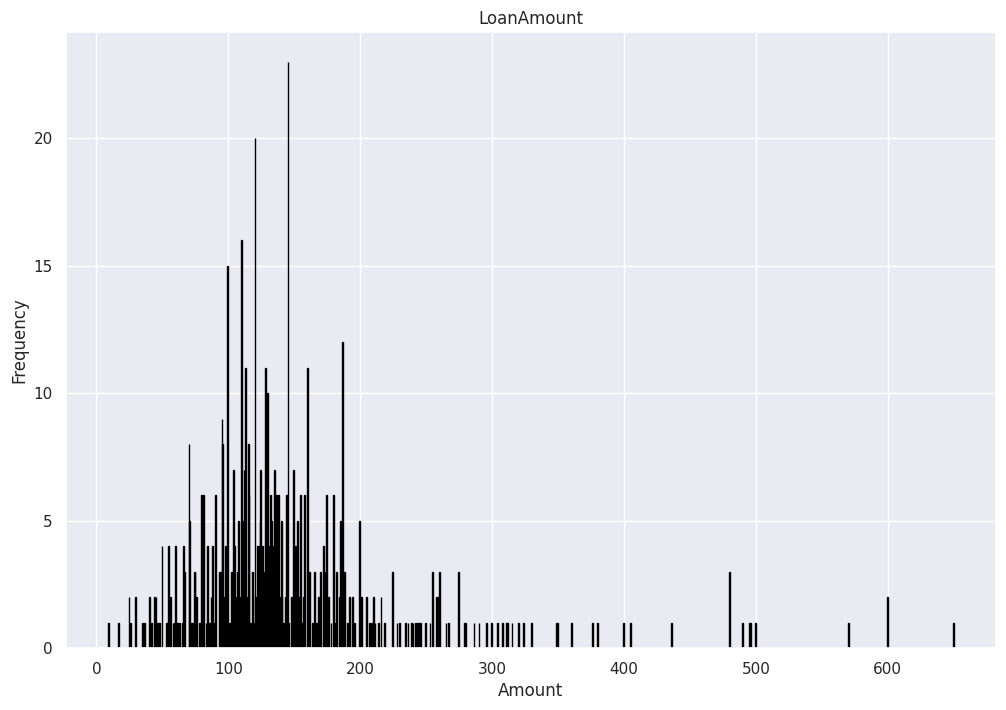

In [25]:
plt.figure(figsize = (12,8))
plt.hist(df['LoanAmount'], bins = 1000, edgecolor='black')
plt.title('LoanAmount')
plt.xlabel('Amount')
#plt.yticks([1,2,3,4,5,6,7,8,9,10,11])
plt.ylabel('Frequency')
plt.show()

In [26]:
l = df['Loan_Amount_Term'].unique().tolist()
len(l)

10

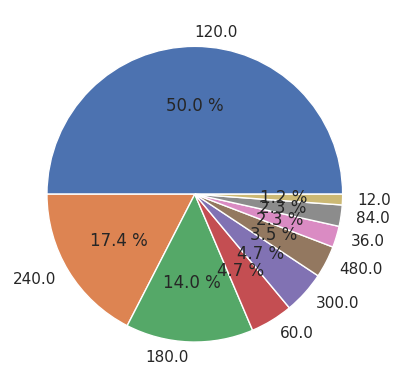

In [27]:
df_360 = df[df['Loan_Amount_Term'] == 360]
df_not_360 = df[df['Loan_Amount_Term'] != 360]

values = df_not_360['Loan_Amount_Term'].value_counts()
labels = df_not_360['Loan_Amount_Term'].unique().tolist()
plt.pie(values, labels = labels,autopct = "%.1f %%")
plt.show()

In [28]:
print("Number of people with loan term equal to 360 = ", df_360.shape[0])

Number of people with loan term equal to 360 =  515


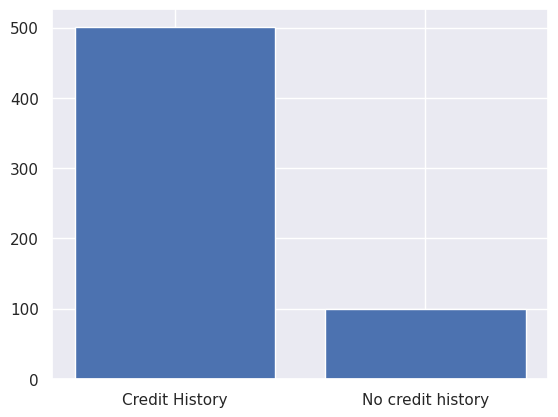

In [29]:
labels = ['Credit History', 'No credit history']
values = df['Credit_History'].value_counts()
plt.bar(labels, values)
plt.show()

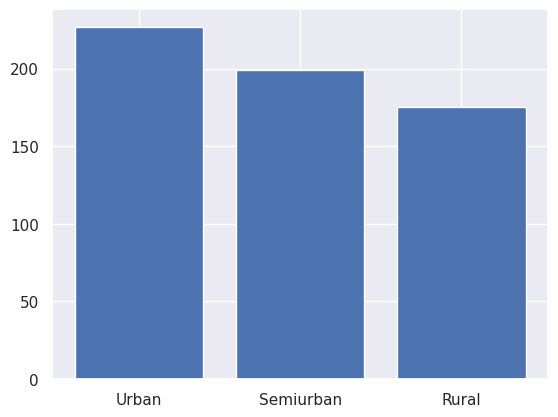

In [30]:
labels=  ['Urban', 'Semiurban', 'Rural']
values = df['Property_Area'].value_counts()
plt.bar(labels,values)
plt.show()

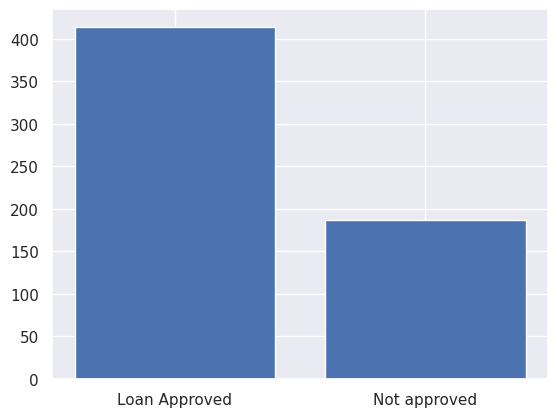

In [31]:
labels = ['Loan Approved', "Not approved"]
values = df['Loan_Status'].value_counts()
plt.bar(labels, values)
plt.show()

**Standardizing the data without using Standard Scaler form sklearn**

In [32]:
def get_z_score(df, column_name):
  mean = df[column_name].mean()
  std = df[column_name].std()
  Z_score_value = (df[column_name] - mean)/std
  return Z_score_value

In [33]:
feature_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = df[feature_columns]
y = df['Loan_Status']

In [34]:
for column in X.columns:
  X[column] = get_z_score(X, column)

<ipython-input-34-91d6c46fa689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = get_z_score(X, column)


In [35]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.478182,-1.348542,-0.735597,0.532649,-0.385865,0.095264,-0.551157,0.000000,0.271499,0.446395,1.217582
1,0.478182,0.740308,0.262357,0.532649,-0.385865,-0.123150,-0.039561,-0.209993,0.271499,0.446395,-1.318872
2,0.478182,0.740308,-0.735597,0.532649,2.587271,-0.396254,-0.551157,-0.975073,0.271499,0.446395,1.217582
3,0.478182,0.740308,-0.735597,-1.874284,-0.385865,-0.468196,0.248806,-0.308713,0.271499,0.446395,1.217582
4,0.478182,-1.348542,-0.735597,0.532649,-0.385865,0.121315,-0.551157,-0.049573,0.271499,0.446395,1.217582


**Making Training and Testing data**

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 97)

**K Nearest Neighbors**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
K = []
training = []
test = []
scores = {}

for k in range(1, 10):
    clf2 = KNeighborsClassifier(n_neighbors = k)
    clf2.fit(X_train, y_train)

    training_score = clf2.score(X_train, y_train)
    test_score = clf2.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [39]:
for keys, values in scores.items():
    print(keys, ':', values)

1 : [1.0, 0.7024793388429752]
2 : [0.8458333333333333, 0.6446280991735537]
3 : [0.8333333333333334, 0.7355371900826446]
4 : [0.8083333333333333, 0.7024793388429752]
5 : [0.8166666666666667, 0.768595041322314]
6 : [0.8, 0.7520661157024794]
7 : [0.7854166666666667, 0.7851239669421488]
8 : [0.7979166666666667, 0.7851239669421488]
9 : [0.7895833333333333, 0.7933884297520661]


**Hence 8 neighbors are the optimal number of neighbors for highest testing accuracy without overfitting**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
print("Training accuracy = ", 100*accuracy_score(y_train, y_pred_train), "%")

Training accuracy =  79.16666666666666 %


In [ ]:
y_pred_test = model.predict(X_test)
print("Testing accuracy = ", 100*accuracy_score(y_test, y_pred_test), "%")

Testing accuracy =  80.99173553719008 %


**Implementing our own Logistic Regression**

In [ ]:
class LogisticRegression2():

  # Constructor
  def __init__(self, learning_rate = 0.01, number_of_iterations = 1000):

    # Just to verify the cration of the model
    print("Model created successfully!")

    # Initialising the learning rate and number of iterations
    self.learning_rate = learning_rate
    self.number_of_iterations = number_of_iterations


  # Function to split train and test dataset
  def Split(self, df, feature_columns, target_column):

    # Finding what row value is nearest to eighty percent of the total rows of the dataset
    eighty_percent = int(len(df)*0.8)
    print(eighty_percent)

    # Making two separate data frames for training and testing
    df_train = df[:int(eighty_percent)]
    df_test = df[int(eighty_percent):]

    # Initialising the training X and y
    X_train = df_train[feature_columns]
    y_train = df_train[target_column]

    # Initialising the testing X and y
    X_test = df_test[feature_columns]
    y_test = df_test[target_column]

    return X_train, y_train, X_test, y_test

  # Function to fit and train the model
  def Fit(self, X, y):

    # Number of rows in X = m
    self.m = X.shape[0]

    # Number of features in X = n
    self.n = X.shape[1]

    # Initaialising the weights of the model
    self.weights = np.zeros(self.n)

    # Initialising the bias of the model
    self.bias = 0

    # Calling the  Gradient descent function to get optimum values of weights and bias
    self.Gradient_descent(X,y)
    print("Model trainied successfully!")


  def Gradient_descent(self,X,y):

    for i in range(self.number_of_iterations):

      # Let's calculate the z values
      z = np.dot(X,self.weights) + self.bias

      # Let's calculate the y_hat values using the sigmoid function
      y_hat = 1/(1 + np.exp(-z))

      # Calculating the dervivates
      dw = (1/self.m)*(np.dot( X.T, (y_hat - y) ))
      db = (1/self.m)*(np.sum(y_hat - y))

      # Updating the weights and bias values
      self.weights = self.weights - self.learning_rate*dw
      self.bias = self.bias - self.learning_rate*db

  def Predict(self,X):

    # Calculating the predictions
    z = np.dot(X,self.weights) + self.bias
    y_pred = 1/(1 + np.exp(-z))

    # Assigning the class to the predictions
    y_pred = np.where(y_pred > 0.5, 1, 0)

    return y_pred


In [ ]:
model_psg = LogisticRegression2()

Model created successfully!


In [ ]:
model_psg.Fit(X_train, y_train)

Model trainied successfully!


In [ ]:
y_pred_train = model_psg.Predict(X_train)
print("Training accuracy = ", 100*accuracy_score(y_train, y_pred_train), "%")

Training accuracy =  78.75 %


In [ ]:
y_pred_test2 = model_psg.Predict(X_test)
print("Testing accuracy = ", 100*accuracy_score(y_test, y_pred_test), "%")

Testing accuracy =  80.99173553719008 %
